**Housing Price Prediction Data**


Explore the fascinating world of housing price prediction with this synthetic dataset

1.Problem Definition.


Build machine learning models and Predict the housing price based on the provided features.

2.Data

The data was downloaded from kaggle: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/data

3.Evaluation.

Build a machine learning model and predicting a house price.

The target or goal of the model accuracy is 95%.

4.Features.

 * Square footage.
 * Bedrooms.
 * Bathrooms.
 * Neighborhood types.
 * The year of construction.

In [ ]:
# import the libary's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the data
data=pd.read_csv("housing_price_dataset.csv")

In [ ]:
# show the data
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
# data describe
data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [ ]:
# the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
#checking  any missing value
data.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

There is no more missing value

In [ ]:
data["Neighborhood"]

0         Rural
1         Rural
2        Suburb
3         Urban
4        Suburb
          ...  
49995     Rural
49996    Suburb
49997    Suburb
49998     Rural
49999     Rural
Name: Neighborhood, Length: 50000, dtype: object

Convert the object into number using label encoding

In [ ]:
data.Neighborhood.value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

there is 3 different value in neighborhood

In [ ]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# transforming a column into number
label=LabelEncoder()
data["Neighborhood_labeled"]=label.fit_transform(data["Neighborhood"])
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_labeled
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,1
3,2294,2,1,Urban,1996,206786.787153,2
4,2130,5,2,Suburb,2001,272436.239065,1
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,0
49996,2854,2,2,Suburb,1988,374507.656727,1
49997,2979,5,3,Suburb,1962,384110.555590,1
49998,2596,5,2,Rural,1984,380512.685957,0


In [ ]:
data.Neighborhood_labeled.value_counts()

1    16721
0    16676
2    16603
Name: Neighborhood_labeled, dtype: int64

In [ ]:
# drop the Neighborhood column
data.drop(["Neighborhood"],axis=1,inplace=True)

In [ ]:
# show the data
data

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_labeled
0,2126,4,1,1969,215355.283618,0
1,2459,3,2,1980,195014.221626,0
2,1860,2,1,1970,306891.012076,1
3,2294,2,1,1996,206786.787153,2
4,2130,5,2,2001,272436.239065,1
...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,0
49996,2854,2,2,1988,374507.656727,1
49997,2979,5,3,1962,384110.555590,1
49998,2596,5,2,1984,380512.685957,0


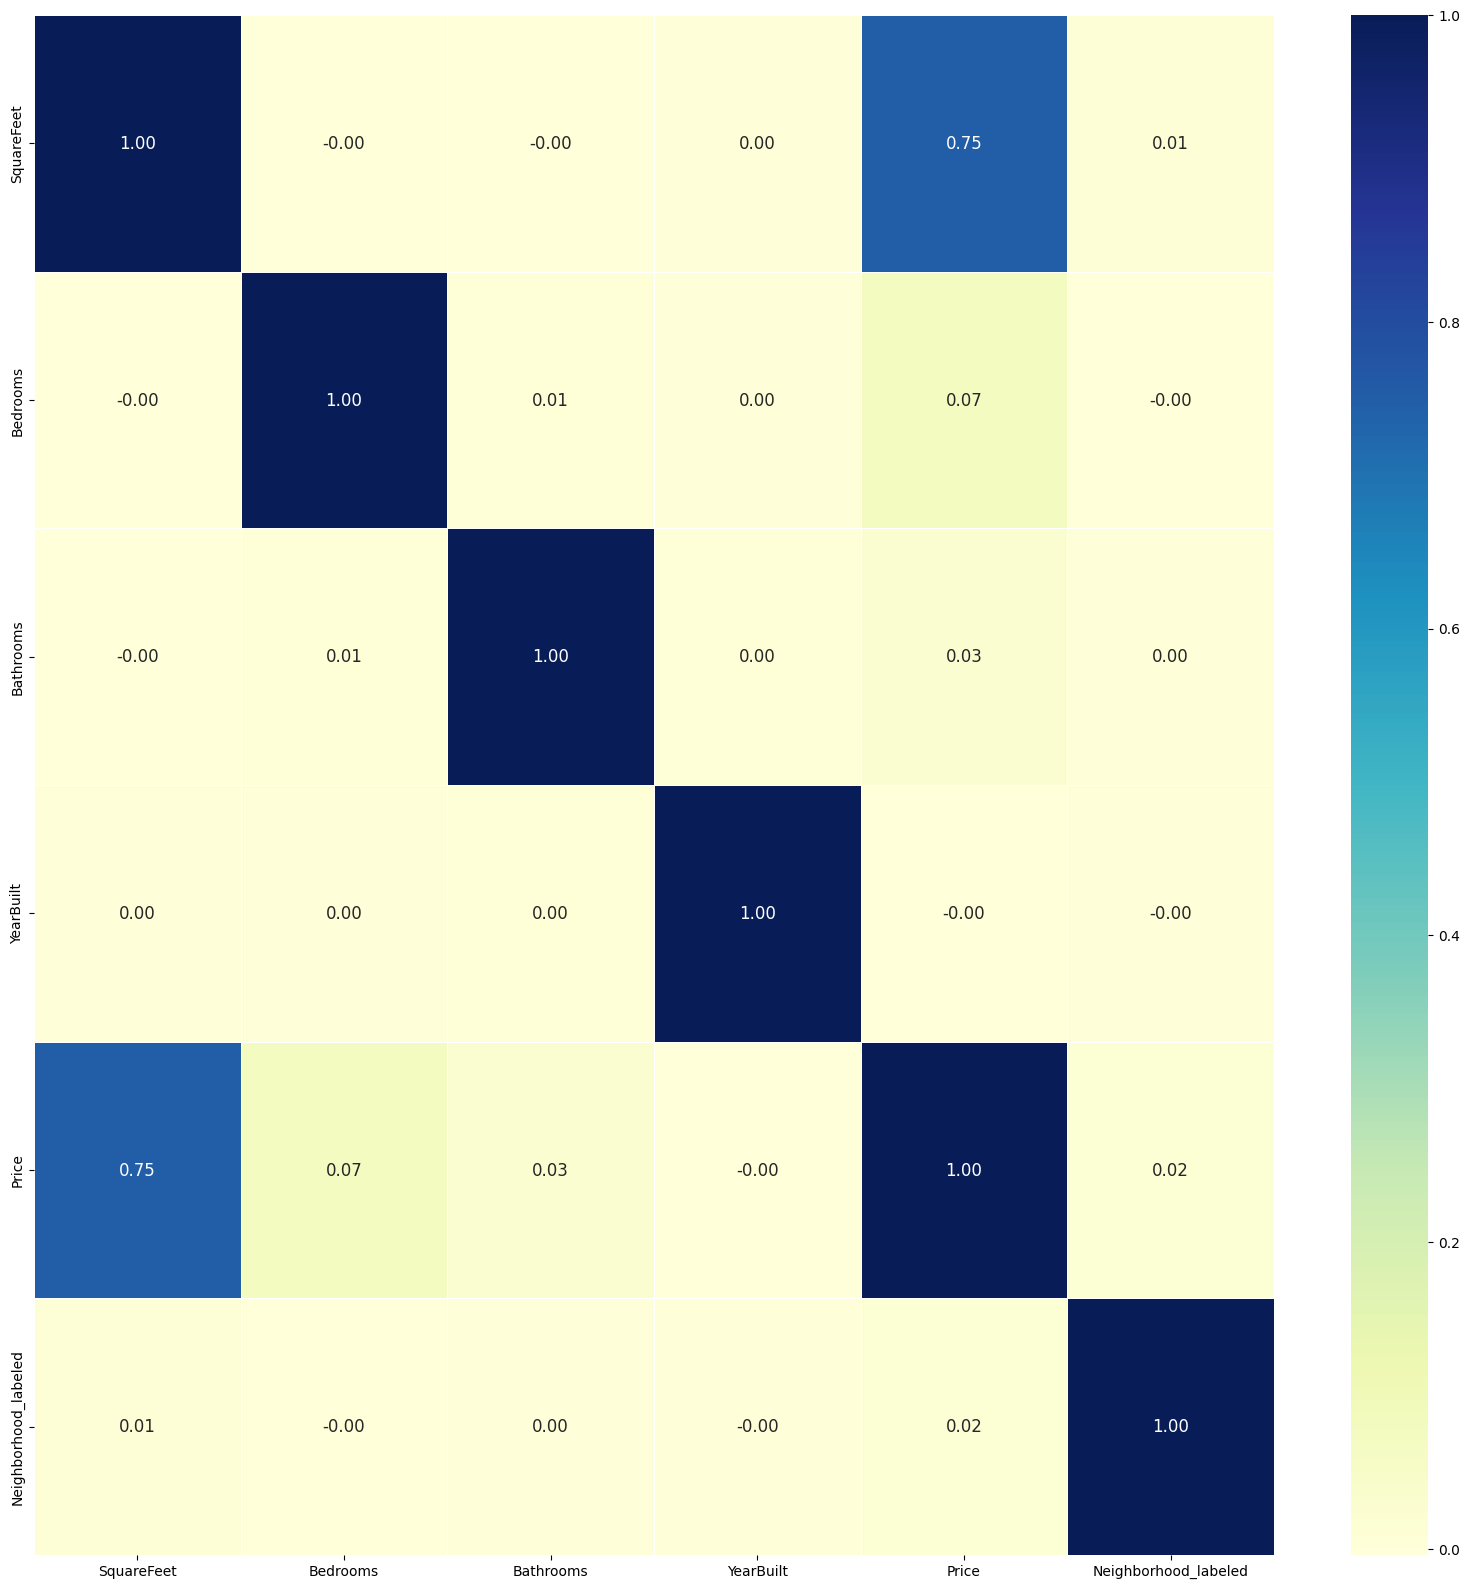

In [ ]:
# data.corr()
c=data.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(c,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu",ax=ax,annot_kws={"size":12})
plt.show()

In [ ]:
# split a data into x and y
x=data.drop(["Price"],axis=1)

In [ ]:
x

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_labeled
0,2126,4,1,1969,0
1,2459,3,2,1980,0
2,1860,2,1,1970,1
3,2294,2,1,1996,2
4,2130,5,2,2001,1
...,...,...,...,...,...
49995,1282,5,3,1975,0
49996,2854,2,2,1988,1
49997,2979,5,3,1962,1
49998,2596,5,2,1984,0


In [ ]:
y=data["Price"]
y

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64

In [ ]:
# import train set split
from sklearn.model_selection import train_test_split

In [ ]:
# split into training sets and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# import model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
def baseline_score(models,x_train,x_test,y_train,y_test):
  model_score={}
  for label,model in models.items():
    model.fit(x_train,y_train)
    model_score[label]=model.score(x_test,y_test)
  return model_score

In [ ]:
# 3 models into dictionary
models={"linear":LinearRegression(),
        "RandomForest":RandomForestRegressor(),
        "Ridge":Ridge()}

In [ ]:
base_line_score=baseline_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
base_line_score

{'linear': 0.572443316868489,
 'RandomForest': 0.5159459071191665,
 'Ridge': 0.5724433187843441}

Hyperturning using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 1. RandomForestRegressor
grid={"n_estimators":[10,100,300,500,1000],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,3,5],
      "max_features":["sqrt"]}

In [ ]:
random_for=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=grid,cv=5,n_iter=10,verbose=True)
random_for.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 300, 500,
                                                         1000]},
                   verbose=True)

In [ ]:
# best parms
random_for.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'sqrt'}

In [ ]:
random_for.score(x_test,y_test)

0.5533531806693455

In [ ]:
grid_1={"n_estimators": [100,500,1000],
        "min_samples_split": [2,4],
        "min_samples_leaf": [3,5],
        "max_features": ["sqrt"],
        "max_depth":[None,10,20]}

In [ ]:
3*2*2*1*5*3

180

In [ ]:
# import Gridsearch
from sklearn.model_selection import GridSearchCV

In [ ]:
clr=RandomForestRegressor(n_jobs=-1,random_state=42)

In [ ]:
grid_for=GridSearchCV(clr,param_grid=grid_1,cv=5,verbose=True)
grid_for.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 500, 1000]},
             verbose=True)

In [ ]:
grid_for.score(x_test,y_test)

0.5672643385892326

In [ ]:
grid_for.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 1000}

Adjusting estimators by hand

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
for i in range(10,100,10):
  clr=RandomForestRegressor(n_estimators=i)
  print(f"the fitting {i}estimators")
  clr.fit(x_train,y_train)
  print(f"the model score {clr.score(x_test,y_test)*100:.2f}%")
  print()

the fitting 10estimators
the model score 48.13%

the fitting 20estimators
the model score 50.09%

the fitting 30estimators
the model score 50.80%

the fitting 40estimators
the model score 51.03%

the fitting 50estimators
the model score 51.43%

the fitting 60estimators
the model score 51.36%

the fitting 70estimators
the model score 51.71%

the fitting 80estimators
the model score 51.62%

the fitting 90estimators
the model score 51.65%



Evaluation metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
def evaluation_metrics(y_true,y_preds):
  mae=mean_absolute_error(y_true,y_preds)
  mqe=mean_squared_error(y_true,y_preds)
  r2=r2_score(y_true,y_preds)
  metrics={"r2_score":round(r2,2),
           "mean_absoluate_error":round(mae,2),
           "mean_squared_error":round(mqe,2)}
  print(f"the r2 score of the model:{r2*100:.2f}%")
  print(f"the mean absolute error of the model:{mae}")
  print(f"the mean squared error of the model :{mqe}")
  return metrics

RandomizedSearchCv model Metrics

In [ ]:
y_preds=random_for.predict(x_test)

In [ ]:
randomized_Forest_model_metrics=evaluation_metrics(y_test,y_preds)
randomized_Forest_model_metrics

the r2 score of the model:55.34%
the mean absolute error of the model:40432.72711039163
the mean squared error of the model :2584937157.65916


{'r2_score': 0.55,
 'mean_absoluate_error': 40432.73,
 'mean_squared_error': 2584937157.66}

gridSearchCv model metrics

In [ ]:
y_preds=grid_for.predict(x_test)

In [ ]:
grid_forest_model_metrics=evaluation_metrics(y_test,y_preds)
grid_forest_model_metrics

the r2 score of the model:56.73%
the mean absolute error of the model:39818.32097745362
the mean squared error of the model :2504427306.3474016


{'r2_score': 0.57,
 'mean_absoluate_error': 39818.32,
 'mean_squared_error': 2504427306.35}

**save**

In [ ]:
from joblib import dump,load
dump(grid_for,filename="Random_forest_model_house.joblib")

['Random_forest_model_house.joblib']